<a href="https://colab.research.google.com/github/avanegasp/Proyecto_Final_Ucataluna/blob/main/Proyecto_Final_UCatalu%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
viviendas = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Alura/main/inmuebles_bogota.csv')

In [30]:
copy_ind = viviendas.copy()

In [29]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [31]:
#Cambio el nombre de Baños y Área
columnas = {'Baños' : 'Banos', 'Área' : 'Area_m2'}
viviendas = viviendas.rename(columns = columnas)

In [32]:
viviendas.describe(include='object')

,Tipo,Descripcion,Barrio,UPZ,Valor
count,9520,9520,9520,9478,9520
unique,8,316,149,63,1039
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén,$ 450.000.000
freq,7327,916,1105,1681,128


In [33]:
columnas = {'UPZ':'UPL'}
viviendas = viviendas.rename(columns=columnas)

In [34]:
viviendas.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area_m2', 'Barrio',
       'UPL', 'Valor'],
      dtype='object')

In [35]:
viviendas.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
2953,Apartamento,Apartamento en venta en Bosa,3,2,62,Bosa,Bosa Central,$ 150.000.000
7424,Apartamento,Apartamento en venta en Bosa,3,1,53,Bosa,Bosa Central,$ 144.000.000
155,Apartamento,Apartamento en venta en Cedritos,4,3,135,Cedritos,Usaquén,$ 635.000.000
6015,Apartamento,Apartamento en venta en Engativa,3,2,60,Engativa,Engativá,$ 250.000.000
7711,Apartamento,Apartamento en venta en Engativa,3,1,40,Engativa,Engativá,$ 180.000.000


In [36]:
viviendas.describe()

,Habitaciones,Banos,Area_m2
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


Se puede observar que hay que confirmar los datos máximos de habitaciones, área y mínimo de Baños

In [37]:
max_habi = viviendas.loc[viviendas['Habitaciones'] >= 110]
max_habi

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000


## Analisis Univariado

#### Habitaciones

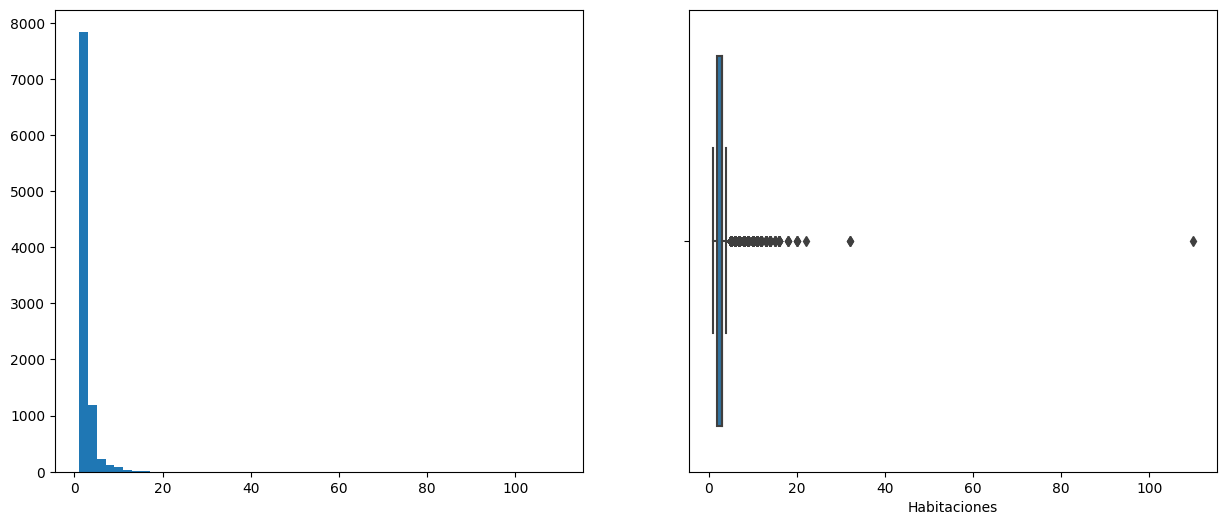

In [38]:
fig, axes = plt.subplots (1,2, figsize = (15,6))
#Frecuencia
axes[0].hist(viviendas['Habitaciones'], bins=54)

#Distribución
sns.boxplot(x=viviendas['Habitaciones'], ax=axes[1])

plt.show()

In [39]:
habi_15 = viviendas.loc[viviendas['Habitaciones']>15]
habi_15.count()

Tipo            19
Descripcion     19
Habitaciones    19
Banos           19
Area_m2         19
Barrio          19
UPL             19
Valor           19
dtype: int64

### UPL

In [40]:
viv_sort = viviendas['UPL'].value_counts()
viv_sort

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

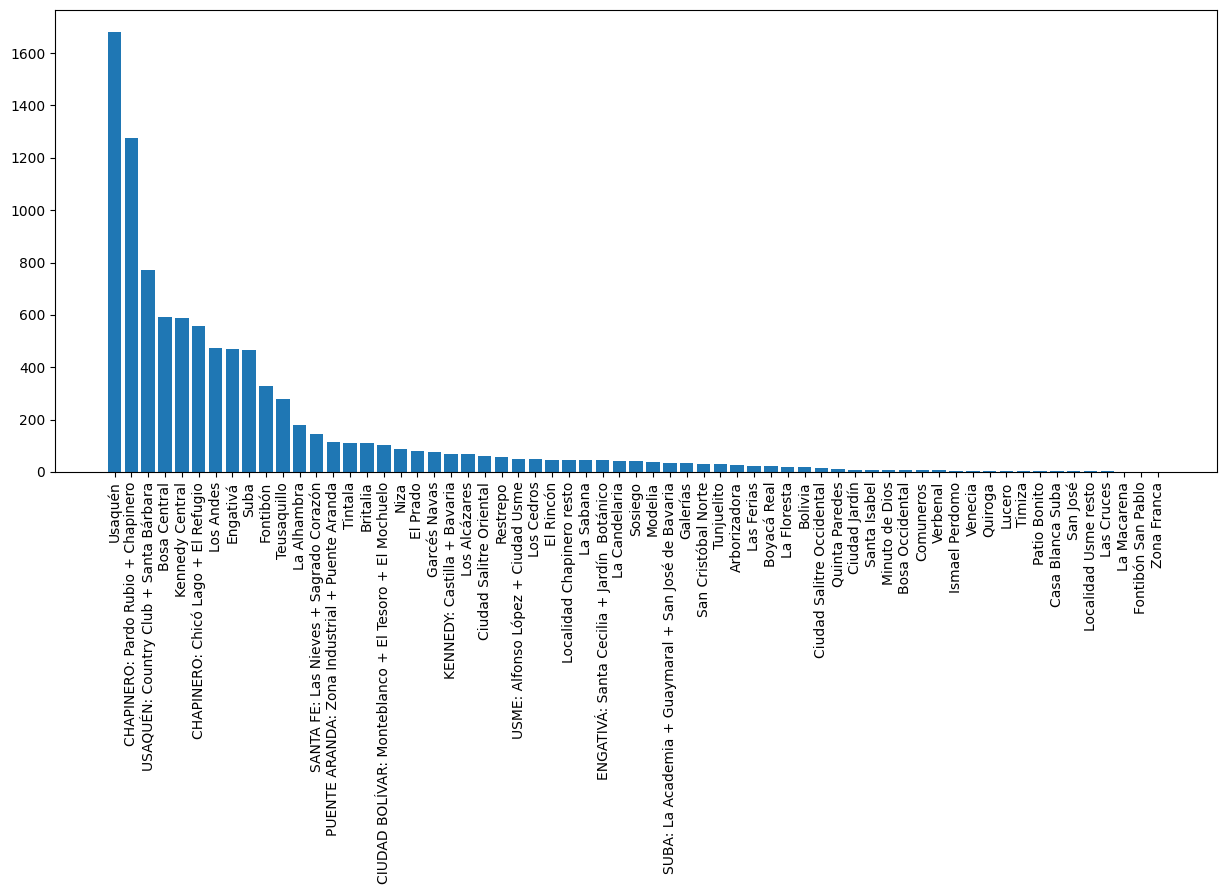

In [41]:
plt.figure(figsize=(15,6))
plt.bar(viv_sort.index, viv_sort.values)
plt.xticks(rotation=90)
plt.show()

### Barrios

In [42]:
barrios = viviendas['Barrio'].value_counts()
barrios

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

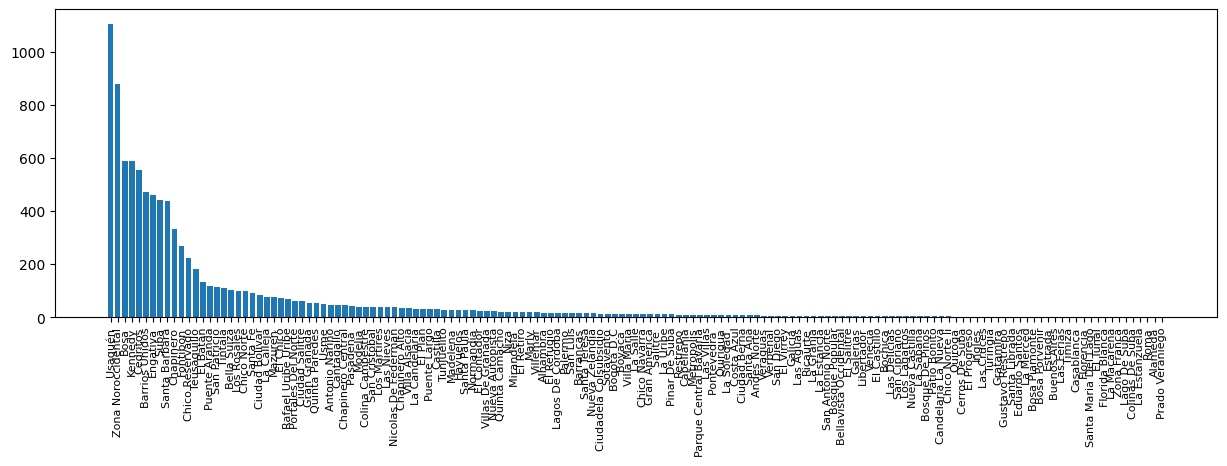

In [43]:
plt.figure(figsize=(15,4))
plt.bar(barrios.index, barrios.values)
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Analisis de datos atípicos

In [44]:
precio = viviendas['Valor']
precio

0         $ 360.000.000
1         $ 670.000.000
2       $ 1.120.000.000
3         $ 890.000.000
4         $ 970.000.000
             ...       
9515      $ 290.000.000
9516      $ 670.000.000
9517      $ 900.000.000
9518      $ 335.000.000
9519      $ 144.990.000
Name: Valor, Length: 9520, dtype: object

### Viviendas con 1 habitación

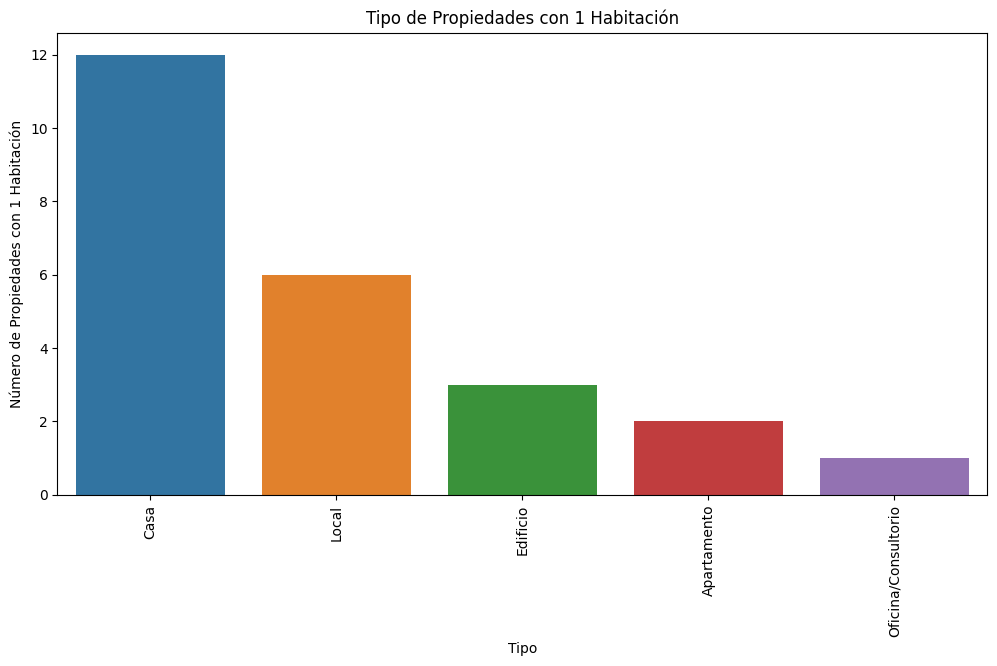

In [45]:
min_habi = viviendas.loc[viviendas['Habitaciones'] >= 15]
conteo = min_habi['Tipo'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=conteo.index, y=conteo.values)
plt.xlabel("Tipo")
plt.ylabel("Número de Propiedades con 1 Habitación")
plt.title("Tipo de Propiedades con 1 Habitación")
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización
plt.show()

In [46]:
habi = viviendas.loc[viviendas['Habitaciones'] >= 15]
habi['Tipo'].value_counts()

Casa                   12
Local                   6
Edificio                3
Apartamento             2
Oficina/Consultorio     1
Name: Tipo, dtype: int64

In [47]:
habi_box = viviendas.loc[viviendas['Habitaciones'] <= 110]
habi_box['Tipo'].value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

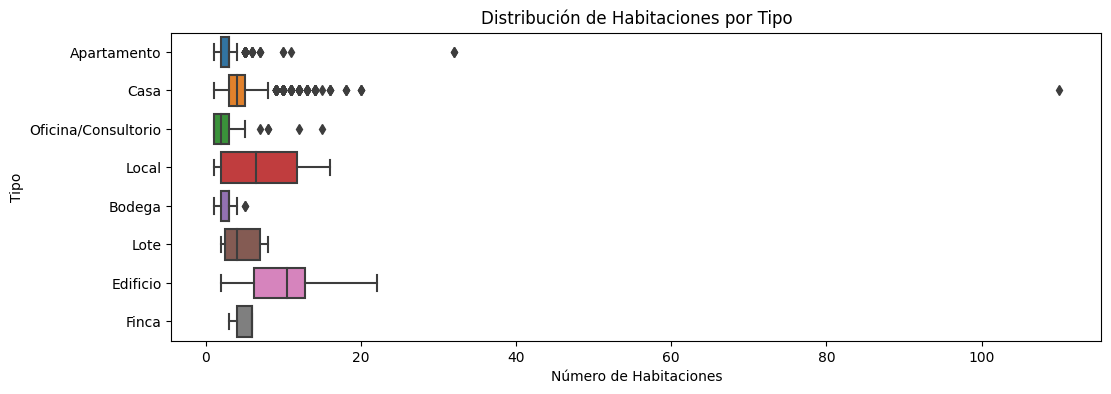

In [48]:
plt.figure(figsize=(12,4))
sns.boxplot(x=habi_box['Habitaciones'], y=habi_box['Tipo'])
plt.ylabel("Tipo")
plt.xlabel("Número de Habitaciones")
plt.title("Distribución de Habitaciones por Tipo")
plt.show()

Una casa tiene más de 100 habitaciones

### Viviendas con áreas mayores a 13000 m2

In [49]:
max_area = viviendas.loc[viviendas['Area_m2'] >= 13000]
max_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,$ 850.000.000


In [50]:
min_area = viviendas.loc[viviendas['Area_m2'] <= 10]
min_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000
9256,Apartamento,Apartamento en venta en Rafael Uribe Uribe,2,1,5,Rafael Uribe Uribe,Los Alcázares,$ 200.000.000


### Viviendas con 0 baños

In [51]:
max_banos = viviendas.loc[viviendas['Banos'] == 0]
max_banos

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000


## Imputaciones

In [52]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area_m2       9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [53]:
viviendas_null = viviendas['UPL'].isnull().sum()
viviendas_null

42

#### Eliminación de los null en las filas

In [54]:
#Hay 42 datos nulos perteneciente a 1 columnas
viviendas.isnull().sum(axis = 0).value_counts()

0     7
42    1
dtype: int64

In [55]:
#La columna que contiene los nulos
columnas_con_nulos = viviendas.columns[viviendas.isnull().any()]
print(columnas_con_nulos)

Index(['UPL'], dtype='object')


Se revisa que falta solo 1 datos en 42 filas, son UPL.

In [56]:
# Probar eliminando todos los null de las columnas
viviendas_1 = viviendas.dropna(axis=0)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_1.shape)

(9520, 8)
(9478, 8)


In [57]:
viviendas_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9478 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9478 non-null   object
 1   Descripcion   9478 non-null   object
 2   Habitaciones  9478 non-null   int64 
 3   Banos         9478 non-null   int64 
 4   Area_m2       9478 non-null   int64 
 5   Barrio        9478 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9478 non-null   object
dtypes: int64(3), object(5)
memory usage: 666.4+ KB


Se eliminan las filas con valores nulos

In [58]:
#Criterio para saber la perdida de data al borrar por filas
(viviendas.size - viviendas_1.size)*100/viviendas.size

0.4411764705882353

Con esta eliminación solo se borra un 4% de la data

---



#### Eliminación de los null en columnas

In [59]:
#Hay 42 datos nulos en 1 columna
viviendas.isnull().sum(axis = 1).value_counts()

0    9478
1      42
dtype: int64

In [60]:
# Probar eliminando todos los null de las columnas
viviendas_2 = viviendas.dropna(axis=1)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_2.shape)

(9520, 8)
(9520, 7)


In [61]:
#Criterio para saber la perdida de data al borrar por columnas
(viviendas.size - viviendas_2.size)*100/viviendas.size

12.5

Con esta eliminación se borra un 12% de la data, cantidad importante


### Imputación con la moda correspondiente

In [62]:
viviendas_4 = viviendas

In [63]:
#Se trabajará en base a estos datos null por cada columna
viviendas_3 = viviendas.isnull().sum().sort_values(ascending = False)
viviendas_3

UPL             42
Tipo             0
Descripcion      0
Habitaciones     0
Banos            0
Area_m2          0
Barrio           0
Valor            0
dtype: int64

In [64]:
moda = viviendas['UPL'].value_counts()
moda

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

In [65]:
type(moda)

pandas.core.series.Series

In [66]:
valor_modal = moda.index[0:6]
valor_modal

Index(['Usaquén', 'CHAPINERO: Pardo Rubio + Chapinero',
       'USAQUÉN: Country Club + Santa Bárbara', 'Bosa Central',
       'Kennedy Central', 'CHAPINERO: Chicó Lago + El Refugio'],
      dtype='object')

In [67]:
frecuencia_modal = moda.iloc[0:6]
frecuencia_modal

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
CHAPINERO: Chicó Lago + El Refugio        557
Name: UPL, dtype: int64

En base a los anteriores datos se toma la desición de hacer la imputación al valor que más datos tiene, es la UPL 'Usaquen'

In [68]:
viviendas_4['UPL'].isnull().value_counts()

False    9478
True       42
Name: UPL, dtype: int64

In [69]:
viviendas_4['UPL'] = viviendas['UPL'].fillna(value = 'Usaquén')

In [70]:
viviendas_4['UPL'].isnull().value_counts()

False    9520
Name: UPL, dtype: int64

In [71]:
viviendas_4['UPL'].sample(10)

1121    USAQUÉN: Country Club + Santa Bárbara
5889                                  Usaquén
5124    USAQUÉN: Country Club + Santa Bárbara
882                                   Usaquén
7163                                 Fontibón
3012       CHAPINERO: Chicó Lago + El Refugio
4713       CHAPINERO: Chicó Lago + El Refugio
8603       CHAPINERO: Chicó Lago + El Refugio
3799       CHAPINERO: Pardo Rubio + Chapinero
992                               La Alhambra
Name: UPL, dtype: object

In [72]:
moda_2 = viviendas['UPL'].value_counts()
moda_2

Usaquén                                  1723
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

In [73]:
viviendas_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area_m2       9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPL           9520 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### Los 10 primeros barrios


<Axes: >

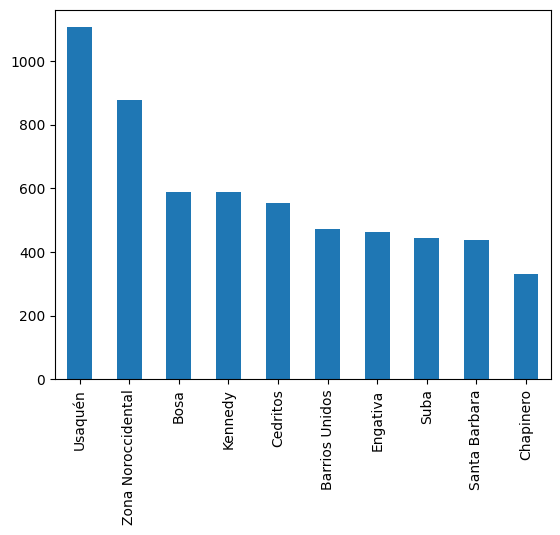

In [78]:
inmuebles_barrio = viviendas.Barrio.value_counts()
inmuebles_barrio.head(10).plot.bar()

#### Propiedades más costosas

In [89]:
costos = viviendas_4['Valor'].value_counts()
top_10_least_customers = costos.tail(10)

costo = pd.DataFrame(top_10_least_customers)
costo

,Valor
$ 806.000.000,1
$ 679.000.000,1
$ 1.193.390.000,1
$ 592.500.000,1
$ 206.000.000,1
$ 1.499.999.000,1
$ 531.000.000,1
$ 2.755.500.000,1
$ 5.250.000.000,1
$ 144.990.000,1


In [97]:
type(viviendas_4.Valor[0])

str

In [101]:
viviendas_4['Valor'][0].split()

['$', '360.000.000']

In [102]:
#Se separa el simbolo $ y se tiene una casilla con de ´precio' que sigue siendo str
valor = viviendas_4.Valor.str.split(expand=True)
viviendas_4['Moneda'] = valor[0]
viviendas_4['Precio'] = valor[1]
viviendas_4.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio
1606,Apartamento,Apartamento en venta en Cedritos,3,3,106,Cedritos,Usaquén,$ 680.000.000,$,680.000.000
7572,Apartamento,Apartamento en venta en Chico Reservado,2,3,130,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.000.000.000,$,1.000.000.000
4611,Apartamento,Apartamento en venta en Palermo,2,1,49,Palermo,Galerías,$ 330.000.000,$,330.000.000


In [104]:
#Sigue siendo str
viviendas_4.Precio.sum()

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [105]:
viviendas_4['Precio'] = viviendas_4['Precio'].str.replace('.','',regex=True)

In [106]:
viviendas_4['Precio'] = viviendas_4.Precio.astype('float')/1000000

In [107]:
viviendas.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio
6286,Apartamento,Apartamento en venta en Bella Suiza,3,3,200,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 830.000.000,$,830.0
3588,Apartamento,Apartamento en venta en Santa Barbara,1,2,62,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 498.000.000,$,498.0
4330,Apartamento,Apartamento en venta en Engativa,3,2,66,Engativa,Engativá,$ 260.000.000,$,260.0


In [128]:
average_barrio = viviendas_4.groupby(['UPL', 'Barrio'])['Precio']

top_10_precio = average_barrio.nlargest(10).head(10)

top_10_precio

UPL           Barrio        
Arborizadora  Madelena  3383    780.0
                        3591    780.0
                        4837    650.0
                        2739    480.0
                        3642    480.0
                        5262    480.0
                        8002    410.0
                        2740    350.0
                        5263    350.0
                        2460    280.0
Name: Precio, dtype: float64

In [141]:
# Supongamos que 'viviendas_4' es tu DataFrame
# Asumiendo que tienes columnas 'Barrio', 'UPL' (o 'UPZ') y 'Precio' en el DataFrame

# Ordena el DataFrame por 'Precio' en orden descendente
viviendas_ordenadas = viviendas_4.sort_values(by='Precio', ascending=False)

# Agrupa por 'Barrio' y selecciona los 10 primeros registros con los precios más altos en cada barrio
top_10_barrios_caros = viviendas_ordenadas.groupby('Barrio').head(10)

top_expensive = pd.DataFrame(top_10_barrios_caros[['Barrio', 'UPL', 'Precio']]).head(10)

top_expensive

,Barrio,UPL,Precio
5234,Usaquén,Usaquén,16000.0
1783,El Chicó,CHAPINERO: Chicó Lago + El Refugio,13200.0
8498,La Candelaria,La Candelaria,10451.5
8693,La Candelaria,La Candelaria,10451.5
2910,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9200.0
1103,Santa Ana,Usaquén,8800.0
1301,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,8550.0
4985,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,8358.0
5718,Usaquén,Usaquén,7500.0
5729,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,7200.0


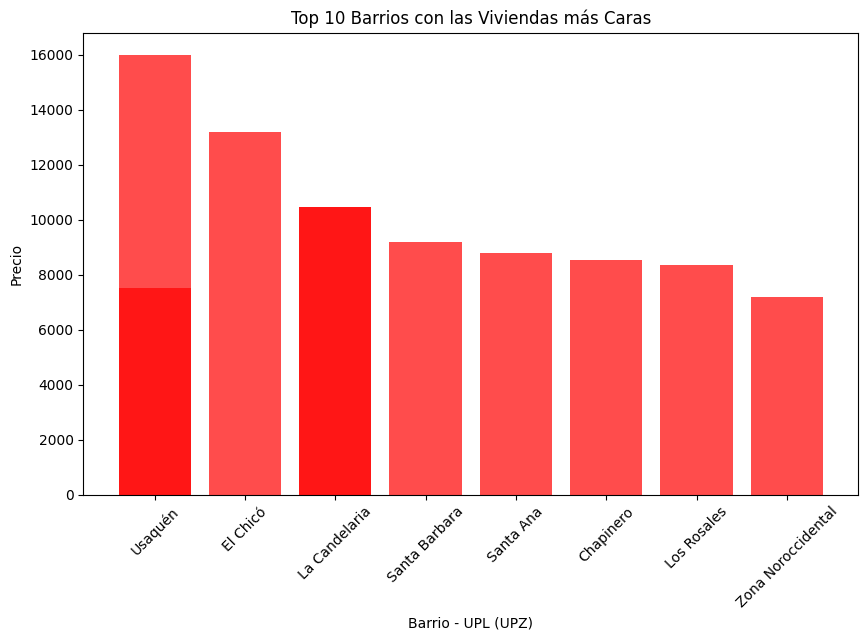

In [144]:
# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_expensive['Barrio'], top_expensive['Precio'], color='r', alpha=0.7)
plt.xlabel('Barrio - UPL (UPZ)')
plt.ylabel('Precio')
plt.title('Top 10 Barrios con las Viviendas más Caras')
plt.xticks(rotation=45)
plt.show()

In [147]:
# Supongamos que 'viviendas_4' es tu DataFrame
# Asumiendo que tienes columnas 'Barrio', 'UPL' (o 'UPZ') y 'Precio' en el DataFrame

# Ordena el DataFrame por 'Precio' en orden descendente
viviendas_ordenadas = viviendas_4.sort_values(by='Precio', ascending=False)

# Agrupa por 'Barrio' y selecciona los 10 primeros registros con los precios más altos en cada barrio
top_10_barrios_caros = viviendas_ordenadas.groupby('Barrio').head(10)

top_cheap = pd.DataFrame(top_10_barrios_caros[['Barrio', 'UPL', 'Precio']]).tail(10)

top_cheap

,Barrio,UPL,Precio
488,Bogotá D.C,Ciudad Salitre Occidental,136.0
3071,Bosa Porvenir,Bosa Occidental,133.0
3014,Bosa Porvenir,Bosa Occidental,133.0
2290,Buenos Aires,Sosiego,130.0
5176,Nueva Castilla,KENNEDY: Castilla + Bavaria,130.0
4708,Buenos Aires,Sosiego,130.0
2708,Galicia,Ismael Perdomo,125.0
7136,San Diego,SANTA FE: Las Nieves + Sagrado Corazón,105.0
4887,Las Aguas,La Candelaria,90.0
2464,Las Aguas,La Candelaria,90.0


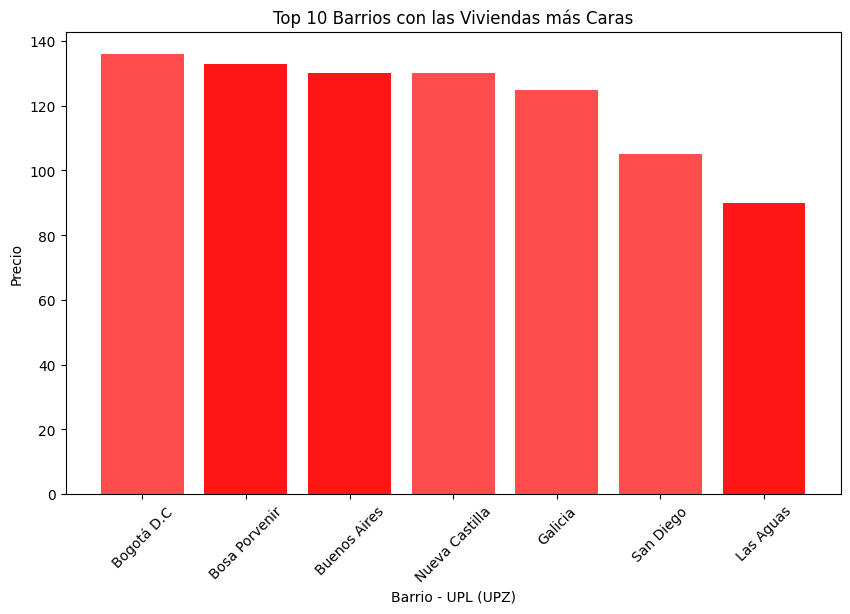

In [146]:
# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_cheap['Barrio'], top_cheap['Precio'], color='r', alpha=0.7)
plt.xlabel('Barrio - UPL (UPZ)')
plt.ylabel('Precio')
plt.title('Top 10 Barrios con las Viviendas más Caras')
plt.xticks(rotation=45)
plt.show()